In [96]:
import numpy as np, pandas as pd, time, os, subprocess, scipy as sp, re
import app_config, importlib, app_lib
import diffmap as dm, importlib
from sklearn.metrics.pairwise import euclidean_distances

# plot_data_df = all_data.obs
# plot_data_df[app_config.params['display_coordinates']['x']] = all_data.obsm['X_umap'][:,0]
# plot_data_df[app_config.params['display_coordinates']['y']] = all_data.obsm['X_umap'][:,1]

In [3]:
# Load gene embedded coordinates.
plot_data_df = pd.read_csv(app_config.params['plot_data_df_path'][0], sep="\t", index_col=False)
# graph_adj = sp.sparse.load_npz(app_config.params['adj_mat_path'])
data_ess = pd.read_csv(app_config.params['raw_ess_data_path'], index_col=0, header=0, sep='\t')
data_ess = data_ess[data_ess.columns[:-4]]   # Only first 481 cols put through GLS, so isolate these

point_names = np.array(plot_data_df['gene_names'])
feat_names = data_ess.columns
cancer_types = data_ess.columns.str.split('_').str[1:].str.join(' ').str.capitalize().str.replace('Haematopoietic and lymphoid tissue', 'Hematopoietic/lymphoid')
additional_colorvars = []#app_config.params['additional_colorvars']

raw_data = data_ess.values

In [46]:
from goatools.associations import read_ncbi_gene2go
from goatools.base import download_ncbi_associations
# Get ftp://ftp.ncbi.nlm.nih.gov/gene/DATA/gene2go.gz
gene2go = download_ncbi_associations()
go2geneids_human = read_ncbi_gene2go("gene2go", taxids=[9606], go2geneids=True)

  wget.download(ftp://ftp.ncbi.nlm.nih.gov/gene/DATA/gene2go.gz out=gene2go.gz)


  gunzip gene2go.gz
  18,069 items READ: gene2go


In [113]:
from goatools.go_search import GoSearch
go2geneids_human = read_ncbi_gene2go("/Users/akshay/github/coessentiality-browser/gene2go", taxids=[9606], go2geneids=True)
srchhelp = GoSearch("data/go-basic.obo", go2items=go2geneids_human)

  18,069 items READ: /Users/akshay/github/coessentiality-browser/gene2go
data/go-basic.obo: fmt(1.2) rel(2018-09-19) 47,343 GO Terms; optional_attrs(comment def relationship synonym xref)


In [102]:
gos = srchhelp.get_matching_gos(re.compile('0000003'))
mn = srchhelp.get_items(gos)

from goatools.test_data.genes_NCBI_9606_ProteinCoding import GENEID2NT


PATTERN SEARCH: "0000003"
MATCH GO:0030509(BMP signaling pathway) defn: "A series of molecular signals initiated by the binding of a member of the BMP (bone morphogenetic protein) family to a receptor on the surface of a target cell, and ending with regulation of a downstream cellular process, e.g. transcription." [GOC:signaling, ISBN:0878932437, PR:000000034]
MATCH GO:0036122(BMP binding) defn: "Interacting selectively and non-covalently with a member of the bone morphogenetic protein (BMP) family." [GOC:BHF, PMID:9660951, PR:000000034]
Found 2 GO(s) out of 18069 matching pattern("0000003")


In [146]:
x = np.load(app_config.params['gotermnames_path'])
x.shape

(47343,)

In [142]:
g = [2,5,1,2,3]
g.append(0)
np.argmax(g)

1

In [121]:
from goatools import obo_parser
go_obo = 'data/go-basic.obo'
go = obo_parser.GODag(go_obo)
gotermIDs = []
gotermnames = []
for go_term in go.values():
    gotermIDs.append(str(go_term.id))
    gotermnames.append(str(go_term.name))

data/go-basic.obo: fmt(1.2) rel(2018-09-19) 47,343 GO Terms


In [128]:
importlib.reload(app_config)
import base64
download_image = app_config.params['download_img_path']
encoded_image = base64.b64encode(open(download_image, 'rb').read())
encoded_image#'data:image/png;base64,{}'.format(encoded_image)

b'iVBORw0KGgoAAAANSUhEUgAAAu4AAALuCAYAAADxHZPKAAAAAXNSR0IArs4c6QAAAAlwSFlzAAAXEgAAFxIBZ5/SUgAAQABJREFUeAHt3Qm4rGlBH/gY2VcF2UHZkkYEBAFBowJBY6J5HpdMHjOJmozLaOLMhMHIxNFJhKDJoIkZGHVUMCqrRHFBURESQBEMsu8NTTfdDfQC3UCzNN2o8/97zhcb6dt937rnvKe+qt/7PP976ta93/mqfnVO1b/eeuurv/JXDAIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQIECBAgQIAAAQ

In [122]:
np.save('gotermIDs.npy', np.array(gotermIDs))    
np.save('gotermnames.npy', np.array(gotermnames))


In [67]:
import goterm_caller
importlib.reload(gprofiler_caller)
gprofiler_caller.gprofiler(['GO:0000003'], mode='gconvert')

AttributeError: 'NoneType' object has no attribute 'name'

In [74]:
g = goterm_caller.gprofiler(['Klf4', 'Pax5', 'Sox2', 'Nanog', 'Jund', 'Max'])
g

,query.number,significant,p.value,term.size,query.size,overlap.size,recall,precision,term.id,domain,subgraph.number,term.name,relative.depth,intersection
term.id,,,,,,,,,,,,,,
GO:0098727,1,True,0.011700,152,6,3,0.500,0.020,GO:0098727,BP,4,maintenance of cell number,1,"NANOG,KLF4,SOX2"
GO:0019827,1,True,0.011000,149,6,3,0.500,0.020,GO:0019827,BP,4,stem cell population maintenance,2,"NANOG,KLF4,SOX2"
GO:0035019,1,True,0.000742,61,6,3,0.500,0.049,GO:0035019,BP,4,somatic stem cell population maintenance,3,"NANOG,KLF4,SOX2"
GO:0009893,1,True,0.031900,3333,6,6,1.000,0.002,GO:0009893,BP,6,positive regulation of metabolic process,1,"NANOG,MAX,JUND,KLF4,SOX2,PAX5"
GO:0051173,1,True,0.016300,2981,6,6,1.000,0.002,GO:0051173,BP,6,positive regulation of nitrogen compound m...,2,"NANOG,MAX,JUND,KLF4,SOX2,PAX5"
GO:0010604,1,True,0.022000,3134,6,6,1.000,0.002,GO:0010604,BP,6,positive regulation of macromolecule metab...,2,"NANOG,MAX,JUND,KLF4,SOX2,PAX5"
GO:0009891,1,True,0.001070,1893,6,6,1.000,0.003,GO:0009891,BP,6,positive regulation of biosynthetic process,2,"NANOG,MAX,JUND,KLF4,SOX2,PAX5"
GO:0009892,1,True,0.016200,2977,6,6,1.000,0.002,GO:0009892,BP,6,negative regulation of metabolic process,1,"NANOG,MAX,JUND,KLF4,SOX2,PAX5"
GO:0051172,1,True,0.004260,2384,6,6,1.000,0.003,GO:0051172,BP,6,negative regulation of nitrogen compound m...,2,"NANOG,MAX,JUND,KLF4,SOX2,PAX5"


In [57]:
ctypes = [x for x in np.unique(cancer_types)]
colorlist = ["#f7ff00","#fabebe","#ff8300","#f000ff","#74ee15","#4363d8","#001eff","#ff3300","#cab2d6","#008080","#808000","#bcf60c","#bec1d4","#fb9a99","#ffd8b1","#3cb44b","#bc5300","#ffe119","#33ccff","#911eb4","#46f0f0","#d220c8","#e6beff","#e6194b","#aaffc3","#000075"]
dict([x for x in zip(ctypes, colorlist[0:len(ctypes)])])

{'Autonomic ganglia': '#f7ff00',
 'Biliary tract': '#fabebe',
 'Bone': '#ff8300',
 'Breast': '#f000ff',
 'Central nervous system': '#74ee15',
 'Cervix': '#4363d8',
 'Endometrium': '#001eff',
 'Hematopoietic/lymphoid': '#ff3300',
 'Kidney': '#cab2d6',
 'Large intestine': '#008080',
 'Liver': '#808000',
 'Lung': '#bcf60c',
 'Oesophagus': '#bec1d4',
 'Ovary': '#fb9a99',
 'Pancreas': '#ffd8b1',
 'Pleura': '#3cb44b',
 'Skin': '#bc5300',
 'Soft tissue': '#ffe119',
 'Stomach': '#33ccff',
 'Thyroid': '#911eb4',
 'Upper aerodigestive tract': '#46f0f0',
 'Urinary tract': '#d220c8'}

In [54]:
feat_names
p = np.array(feat_names)
p.shape

(481,)

In [56]:
# np.random.shuffle(p)
p[:10]#.shape

array(['JJN3_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE',
       'SNU201_CENTRAL_NERVOUS_SYSTEM', 'ONS76_CENTRAL_NERVOUS_SYSTEM',
       'OCIMY7_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE', 'JHOS2_OVARY',
       '697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE', 'LI7_LIVER',
       'KYSE270_OESOPHAGUS', 'TCCSUP_URINARY_TRACT', 'NCIH1437_LUNG'],
      dtype=object)

In [32]:
for i, v in plot_data_df.groupby('custom_colors'):#('roarke_clusters'):
    print (i, v.shape)

Unannotated (17634, 17)


In [33]:
plot_data_df.keys()

Index(['EM_x', 'EM_y', 'EM_z', 'tSNE_x', 'tSNE_y', 'hEM_x', 'hEM_y', 'hEM_z',
       'htSNE_x', 'htSNE_y', 'hUMAP_x', 'hUMAP_y', 'roarke_clusters',
       'top_enriched_clusters', 'gene_names', 'max_enrichments',
       'custom_colors'],
      dtype='object')

In [468]:
itime = time.time()
# Load cell embedded coordinates.
plot_data_df_dict = {}
graph_adj_dict = {}
raw_data_dict = {}
for dname in app_config.params['dataset_names']:
    plot_data_df_dict[dname] = pd.read_csv(app_config.params[dname]['plot_df_path'], sep="\t", index_col=False)
    print("Viz data read: time {}".format(time.time() - itime))
    graph_adj_dict[dname] = sp.sparse.load_npz(app_config.params[dname]['adj_mat_path'])
    print("Graph eigenmap adjacency matrix read: time {}".format(time.time() - itime))
    raw_data_dict[dname] = sp.sparse.load_npz(app_config.params[dname]['raw_data_path'])      # TODO: Write this as a function
    print("Raw data read: time {}".format(time.time() - itime))
# Convert paul, nest raw data to npz files. 
# old_raw_data = pd.read_csv(app_config.params['raw_data_path'], sep=",", header=None, index_col=False)
# raw_data = sp.sparse.csr_matrix(old_raw_data.values)

Viz data read: time 0.02091383934020996
Graph eigenmap adjacency matrix read: time 0.03109884262084961
Raw data read: time 0.27336597442626953
Viz data read: time 0.2924008369445801
Graph eigenmap adjacency matrix read: time 0.303969144821167
Raw data read: time 0.3584609031677246


In [58]:
import umap
itime = time.time()
reducer = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
embedding = reducer.fit_transform(raw_data[:,:40])
print(time.time() - itime)

3.11236572265625


In [67]:
a = [1,2,3,4,5]
l = [0.85,0.90]
arr = np.array(s)
m = arr[np.isin(arr, [2,3,1])]

In [62]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

N = 100000
trace = go.Scattergl(
    x = np.random.randn(N),
    y = np.random.randn(N),
    mode = 'markers',
    marker = dict(
        color = 'rgb(152, 0, 0)',
        line = dict(
            width = 1,
            color = 'rgb(0,0,0)')
    )
)
data = [trace]
py.iplot(data, filename='WebGLmillion.html')

Aw, snap! We didn't get a username with your request.

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

In [37]:
importlib.reload(dm)
plot_data_df = pd.read_csv("data/s2_mouseheme/nest_vizdf.csv.gz", sep="\t", index_col=False)
graph_adj = sp.sparse.load_npz("data/s2_mouseheme/nest_adjmat.npz")
raw_data = sp.sparse.load_npz("data/s2_mouseheme/nest_raw_data.npz")     # TODO: Write this as a function

# plot_data_df.set_index('month')
cell_names = np.array(plot_data_df.index).astype(str)
feat_names = np.array(pd.read_csv('data/s2_mouseheme/gene_names.txt', header=None, index_col=0).index)

In [23]:
importlib.reload(app_config)
all_data = anndata.read_h5ad(app_config.params['plot_df_path'])
# all_data.obs['celltype'][all_data.obs['celltype'] == 'unclear'] = 'dropped'
# all_data.obs['celltype'][all_data.obs['celltype'] == 'unclassified'] = 'dropped'
# all_data.obs['celltype'][all_data.obs['celltype'] == 't_cell'] = 'dropped'
# all_data.obs['celltype'][all_data.obs['celltype'] == 'mesenchyme'] = 'mesenchymal'

plot_data_df = all_data.obs
plot_data_df[app_config.params['display_coordinates']['x']] = all_data.obsm['X_umap'][:,0]
plot_data_df[app_config.params['display_coordinates']['y']] = all_data.obsm['X_umap'][:,1]

graph_adj = all_data.uns['neighbors']['connectivities']
raw_data = all_data.X      # TODO: Write this as a function

# plot_data_df.set_index('month')
feat_names = np.array(all_data.var.index)
cell_names = np.array(plot_data_df.index).astype(str)

In [58]:
from sklearn.decomposition import TruncatedSVD
importlib.reload(app_lib)
def pls_align(graph_adj, batch_IDs, n_components=2, umap=False):
    if n_components > 2:
        umap = True
    toret = np.zeros((len(batch_IDs), n_components))
    batch1_ndces = np.where(batch_IDs == np.unique(batch_IDs)[0])[0]
    batch2_ndces = np.where(batch_IDs == np.unique(batch_IDs)[1])[0]
    gg1 = graph_adj[batch1_ndces][:, batch1_ndces]
    gg2 = graph_adj[batch2_ndces][:, batch2_ndces]
    dmp_all_heat_1 = dm.diffmap_proj(gg1, n_comps=50, n_dims=20, min_energy_frac=0.9, embed_type='diffmap', return_eigvals=False)
    dmp_all_heat_2 = dm.diffmap_proj(gg2, n_comps=50, n_dims=20, min_energy_frac=0.9, embed_type='diffmap', return_eigvals=False)
    # dmp_all_naive, eigvals = dm.diffmap_proj(gg1, t=0, n_comps=reduced_dims, embed_type='naive', return_eigvals=True)
    cm = np.dot(dmp_all_heat_1, dmp_all_heat_2.T)
    tsvd = TruncatedSVD(n_components=n_components, random_state=42)
    d1cm = tsvd.fit_transform(cm)
    d2cm = tsvd.fit_transform(cm.T)
    toret[batch1_ndces, :] = d1cm
    toret[batch2_ndces, :] = d2cm
    if umap:
        pass
    return toret, cm

In [61]:
rd = pls_align(graph_adj, plot_data_df[app_config.params['batchID']], n_components=2)

21 dimensions contain about 0.9000000000000001 fraction of the variance in the first 50 dimensions (t = 35.7124893746196)
21 dimensions contain about 0.9000000000000001 fraction of the variance in the first 50 dimensions (t = 47.5639889185089)


In [42]:
# from sklearn.cross_decomposition import PLSSVD
# plsca = PLSSVD(n_components=2)
# plsca.fit(dmp_all_heat_1.T, dmp_all_heat_2.T)
# PLSSVD(copy=True, n_components=2, scale=True)
# b1t, b2t = plsca.transform(dmp_all_heat_1.T, dmp_all_heat_2.T)

# itime = time.time()
# sc.pp.neighbors(ann_heat)
# print(time.time() - itime)
# itime = time.time()
# sc.tl.umap(ann_heat)
# print(time.time() - itime)

%timeit dm.compute_coclustering(raw_data.toarray())

257 ms ± 5.99 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
mouses[np.random.choice(mouses.shape[0], 20000, replace=False), :]

View of AnnData object with n_obs × n_vars = 20000 × 2797 
    obs: 'Organ', 'n_genes', 'n_counts', 'sample', 'louvain', 'summary2', 'batch', 'organ_sample', 'cnk', 'smp_org', 'chk', 'summary1', 'Organ groups', 'organ groups', 'cell types', 'Dataset', 'Cell types', 'Hox_genes'
    var: 'GeneName', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Cell types_colors', 'Dataset_colors', 'Organ groups_colors', 'cell types_colors', 'idx', 'louvain', 'louvain_colors', 'neighbors', 'organ groups_colors', 'pca', 'rank_genes_groups', 'sample_color', 'sample_colors', 'summary1_colors', 'summary2_colors'
    obsm: 'X_pca', 'X_umap', 'X_umap_3D'
    varm: 'PCs'

In [10]:
import anndata
itime = time.time()
path_pfx = 'data/human_pancreas/objects-pancreas/'
pancs = anndata.read_h5ad(path_pfx + 'pancreas.h5ad')
print("Pancreas data read: time {}".format(time.time() - itime))
path_pfx = 'data/PBMC/'
pbmcs = anndata.read_h5ad(path_pfx + 'PBMC.merged.h5ad')
print("PBMC data read: time {}".format(time.time() - itime))
path_pfx = 'data/mouseAtlas_scRNA/'
mouses = anndata.read_h5ad(path_pfx + 'MouseAtlas.subset.h5ad')
print("Mouse atlas subset read: time {}".format(time.time() - itime))

Pancreas data read: time 1.8181021213531494
PBMC data read: time 2.742293119430542
Mouse atlas subset read: time 11.345010042190552


In [11]:
path_pfx = 'data/human_pancreas/objects-pancreas/'
pancs_harmony = anndata.read_h5ad(path_pfx + 'pancreas_harmony.h5ad')
pancs_mnncorrect = anndata.read_h5ad(path_pfx + 'pancreas_mnncorrect.h5ad')
pancs_mnnpy = anndata.read_h5ad(path_pfx + 'pancreas_mnnpy.h5ad')
pancs_scanorama = anndata.read_h5ad(path_pfx + 'pancreas_scanorama.h5ad')
umap_h = pancs_harmony.obsm['X_umap']
umap_mc = pancs_mnncorrect.obsm['X_umap']
umap_mp = pancs_mnnpy.obsm['X_umap']
umap_s = pancs_scanorama.obsm['X_umap']

In [482]:
"""
Landscape alignment - maps points in arg_mat and ref_mat to the same space.
Input: Adjacency matrices representing the argument and reference manifolds.
Output: Argument returned in refmat's coordinate system.
"""
# def align(mat1, mat2):

feats1 = raw_data_dict['d1']
feats2 = raw_data_dict['d2']
mat1 = graph_adj_dict['d1']
mat2 = graph_adj_dict['d2']

# CCA
# covmat = feats1.dot(feats2.T)

# DIFFUSION MAPS
# num_comps = 200  # Compute more eigenvectors than will be needed
# itime = time.time()
# dmp1_unscaled, eigvals1 = dm.diffmap_proj(mat1, t=0, n_comps=num_comps, embed_type='naive', return_eigvals=True)
# dmp2_unscaled, eigvals2 = dm.diffmap_proj(mat2, t=0, n_comps=num_comps, embed_type='naive', return_eigvals=True)
# print ("Top {} diffusion components computed. Time: {}".format(str(num_comps), str(time.time() - itime)))

# PLS
# cm = np.cumsum(np.linalg.norm(dmp1, axis=0))

In [493]:
dmp1_unscaled.shape

(1920, 199)

In [108]:
scells = np.array(['756', '1977', '2431', '520', '2483', '1741', '1400', '1178', '1249', '1966'])
raw_data = sp.sparse.load_npz(app_config.params['raw_data_path'])
feat_names = np.array(pd.read_csv('data/s2_mouseheme/gene_names.txt', header=None, index_col=0).index)
cell_names = np.array(data_df.index).astype(str)

feat_ndces = np.isin(cell_names, scells)
fdata = raw_data[feat_ndces, :].toarray()
ord_genes = np.argsort(np.std(fdata, axis=0))[::-1][:500]

In [96]:
importlib.reload(app_lib)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
plot(display_heatmap_cb(scells, raw_data, feat_names, cell_names), 
     filename='tmp.html', auto_open=False)

['756' '1977' '2431' '520' '2483' '1741' '1400' '1178' '1249' '1966'] (10,) (10, 500)


'file:///Users/akshay/github/hodos/alignment/tmp.html'

In [309]:
importlib.reload(app_config)
importlib.reload(app_lib)

cells_to_display = np.random.choice(range(len(cell_names)), 100)
mtx_heatmap = raw_data[cells_to_display, :].toarray()
hmcb = app_lib.display_heatmap_cb(mtx_heatmap, feat_names)

trace_info = {
    'name': str(idx), 
    'x': np.zeros(mtx_heatmap.shape[0]), 
    'y': np.arange(mtx_heatmap.shape[0]), 
    'selectedpoints': [], 
    'xaxis': 'x2', 
    'hoverinfo': 'text+name', 
    'text': list(np.array(data_df.index).astype(str)), 
    'mode': 'markers', 
    'type': 'scatter'
}

hmcb['data'].append(trace_info)
plot(hmcb, filename='tmphm.html', auto_open=False)

'file:///Users/akshay/github/hodos/alignment/tmphm.html'

# QC-type diagnostics

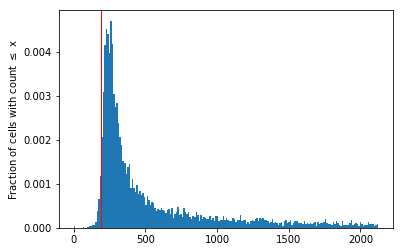

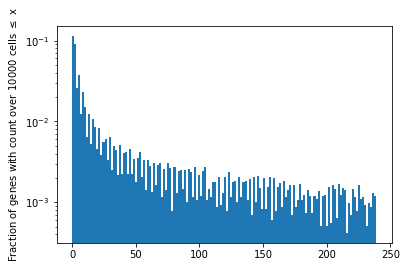

In [246]:
num_genes_per_cell = np.sum(sc4k_data.values > 0, axis=1)
uppb = np.percentile(num_genes_per_cell, 90)
plt.hist(num_genes_per_cell, bins=200, density=True, range=(0,uppb), cumulative=False, linewidth=2)
plt.axvline(np.percentile(num_genes_per_cell, 2), color='r', linestyle='solid', linewidth=1)
plt.ylabel("Fraction of cells with count $\leq$ x")
plt.show()
num_cells_per_gene = np.sum(sc4k_data.values > 0, axis=0)
uppb = np.percentile(num_cells_per_gene, 65)
plt.hist(num_cells_per_gene, bins=150, density=True, log=True, range=(0,uppb), cumulative=False, linewidth=3)
plt.ylabel("Fraction of genes with count over {} cells $\leq$ x".format(str(sc4k_data.values.shape[0])))
plt.show()

# Past this point, cell population is finalized (we can still use a dynamic set of features though)

In [250]:
rd = pd.read_csv(app_config.params['rawdata_fname'], index_col=0, sep='\t')

In [254]:
rd.columns

Index(['0610007P14Rik', '0610009B22Rik', '0610009D07Rik', '0610010F05Rik',
       '0610010K14Rik', '0610011F06Rik', '0610037L13Rik', '1110001A16Rik',
       '1110001J03Rik', '1110004E09Rik',
       ...
       'mmu-mir-7654', 'mt-Co1', 'mt-Cytb', 'mt-Nd1', 'mt-Nd2', 'mt-Nd4',
       'mt-Nd5', 'mt-Nd6', 'mt-Rnr1', 'mt-Tl1'],
      dtype='object', length=5212)

In [247]:
common_genes_young = np.intersect1d(sc4k_data.var_names, sc8k_data.var_names)
sc4k_pool = sc4k_data[:,common_genes_young]
sc8k_pool = sc8k_data[:,common_genes_young]

AttributeError: 'DataFrame' object has no attribute 'var_names'

In [243]:
# markers = ['Casp8', 'Gfp', 'p16', 'p19', 'p21', 'Il6', 'Pai1', 'Mmp1', 'Mmp3', 'Mmp13', 'Igfbp2', 'Ptges', 'Cox2']
GS_key = ['Pax7', 'Myf5', 'MyoD1', 'MyoG', 'Nr4a2', 'Ptger4', 'Bax', 'Casp8', 'Il6', 'Mmp3', 'Mmp13', 'Igfbp2', 'Ptges', 'Ptges2', 'Pbx1', 'mt-Co1', 'mt-Co2', 'mt-Co3']
# To add: CDK inhibitors (p16/19/21)
for k in GS_key:
    print([s for s in common_genes_young if k.lower() in s.lower()])

NameError: name 'common_genes_young' is not defined

## Dimensionality reduction and diffusion components

In [348]:
subset4k_size = sc4k_pool.shape[0]
subset8k_size = sc8k_pool.shape[0]
sc4k_subset = sc4k_pool[np.arange(subset4k_size),:].copy()
sc4k_subset = sc4k_subset[sc4k_subset.obs['n_counts'] > 500]
sc8k_subset = sc8k_pool[np.arange(subset8k_size),:].copy()
sc8k_subset = sc8k_subset[sc8k_subset.obs['n_counts'] > 500]

# Make them equal numbers of cells.
# sc8k_subset = sc8k_subset[np.random.choice(sc8k_subset.shape[0], sc4k_subset.shape[0])]

# sc4k_subset = sc4k_pool[np.random.choice(sc4k_pool.shape[0], subset4k_size, replace=False),:].copy()
# sc8k_subset = sc8k_pool[np.random.choice(sc8k_pool.shape[0], subset8k_size, replace=False),:].copy()

In [355]:
itime = time.time()
knn_k = 10
sc.pp.neighbors(sc4k_subset, n_neighbors=knn_k, use_rep='X', n_pcs=1000, method='umap')
print ("4k {}-NN graph computed. Time: {}".format(str(knn_k), str(time.time() - itime)))
sc.pp.neighbors(sc8k_subset, n_neighbors=knn_k, use_rep='X', n_pcs=1000, method='umap')
print ("8k {}-NN graph computed. Time: {}".format(str(knn_k), str(time.time() - itime)))
graph_4k = sc4k_subset.uns['neighbors']['connectivities']
graph_8k = sc8k_subset.uns['neighbors']['connectivities']
gg4 = lg.calc_over_edges(graph_4k, sc4k_subset)
gg8 = lg.calc_over_edges(graph_8k, sc8k_subset)


4k 10-NN graph computed. Time: 4.410726547241211
8k 10-NN graph computed. Time: 131.83071517944336


In [2]:
_data_path = '/users/abalsubr/hodos/myogenesis/data/'
# sp.sparse.save_npz('/oak/stanford/groups/akundaje/abalsubr/sc_data/Blau_myogenesis/mmyo_young4k_graph_clean.npz', gg4)
# sp.sparse.save_npz('/oak/stanford/groups/akundaje/abalsubr/sc_data/Blau_myogenesis/mmyo_young8k_graph_clean.npz', gg8)
gg4 = sp.sparse.load_npz(_data_path + 'mmyo_young4k_graph_clean.npz')
gg8 = sp.sparse.load_npz(_data_path + 'mmyo_young8k_graph_clean.npz')

In [123]:
vizd4k = pd.DataFrame(data=dmp4, columns=['x', 'y', 'z'])
vizd8k = pd.DataFrame(data=dmp8, columns=['x', 'y', 'z'])
utils.save_for_plotting(vizd4k, '/users/abalsubr/sc-atacplus/mmyo_young4k_3d.csv')
utils.save_for_plotting(vizd8k, '/users/abalsubr/sc-atacplus/mmyo_young8k_3d.csv')

Reminder: metadata columns set to Index(['z'], dtype='object')
Reminder: metadata columns set to Index(['z'], dtype='object')


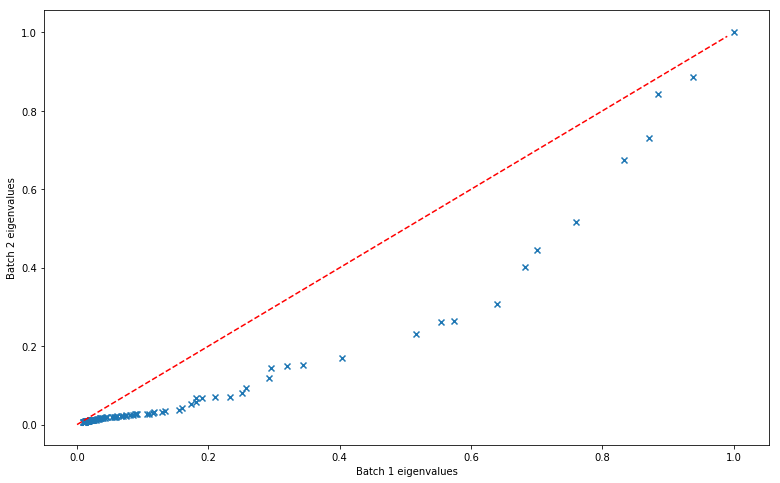

In [371]:
dm.plot_spectra(dmp4_all[1], dmp8_all[1], 100, min_energy_frac=0.95)

# Alignment method: partial least squares

In [387]:
covdims_4k, s, vt = sp.sparse.linalg.svds(dmp4sub.dot(dmp8sub.T), k=4)

# The rest

In [ ]:
def spectral_cocluster(X):
    normalized_data, row_diag, col_diag = _scale_normalize(X)
    n_sv = 1 + int(np.ceil(np.log2(self.n_clusters)))
    u, v = self._svd(normalized_data, n_sv, n_discard=1)
    z = np.vstack((row_diag[:, np.newaxis] * u,
                   col_diag[:, np.newaxis] * v))

    _, labels = self._k_means(z, self.n_clusters)
    return

    n_rows = X.shape[0]
    self.row_labels_ = labels[:n_rows]
    self.column_labels_ = labels[n_rows:]

In [175]:
importlib.reload(app_config)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
iplot(app.display_heatmap_cb(dx))

In [310]:
dtd = np.zeros(40)
dtd[np.random.choice(40, 20)] = np.abs(np.random.randn(20))

In [256]:
# Save the notebook to more viewable html form.
!jupyter nbconvert mouse_myogenesis.ipynb --to html --output /users/abalsubr/hodos/myogenesis/mouse_myogenesis.html

[NbConvertApp] Converting notebook mouse_myogenesis.ipynb to html
[NbConvertApp] Writing 426256 bytes to /users/abalsubr/hodos/myogenesis/mouse_myogenesis.html


In [108]:
for idx, val in vizdf.groupby('cell_types'):
    print (list(val['cell_IDs']))
    break

['cell_1008', 'cell_1239', 'cell_1281', 'cell_1384', 'cell_1702', 'cell_1768', 'cell_2464', 'cell_2497', 'cell_2664', 'cell_2689', 'cell_2945', 'cell_2983', 'cell_3080', 'cell_3085', 'cell_3210', 'cell_3616', 'cell_3662', 'cell_3728', 'cell_3849', 'cell_3935', 'cell_4079', 'cell_4147', 'cell_4158', 'cell_4166', 'cell_4332', 'cell_4373', 'cell_4473', 'cell_4635', 'cell_4647', 'cell_4658', 'cell_4746', 'cell_4794', 'cell_4907', 'cell_4934', 'cell_5107', 'cell_5224', 'cell_5337', 'cell_5588', 'cell_5767', 'cell_5888', 'cell_5994', 'cell_6113', 'cell_6188', 'cell_619', 'cell_6237', 'cell_6248', 'cell_6652', 'cell_6731', 'cell_6843', 'cell_6953', 'cell_7009', 'cell_7087', 'cell_7114', 'cell_7315', 'cell_7327', 'cell_8359', 'cell_8407', 'cell_8479']


In [116]:
dx = ['cell_1008', 'cell_1239', 'cell_1281', 'cell_1384', 'cell_1702', 'cell_1768', 'cell_2464', 'cell_2497', 'cell_2664', 'cell_2689', 'cell_2945', 'cell_2983', 'cell_3080', 'cell_3085', 'cell_3210', 'cell_3616', 'cell_3662', 'cell_3728', 'cell_3849', 'cell_3935', 'cell_4079', 'cell_4147', 'cell_4158', 'cell_4166', 'cell_4332', 'cell_4373', 'cell_4473', 'cell_4635', 'cell_4647', 'cell_4658', 'cell_4746', 'cell_4794', 'cell_4907', 'cell_4934', 'cell_5107', 'cell_5224', 'cell_5337', 'cell_5588', 'cell_5767', 'cell_5888', 'cell_5994', 'cell_6113', 'cell_6188', 'cell_619', 'cell_6237', 'cell_6248', 'cell_6652', 'cell_6731', 'cell_6843', 'cell_6953', 'cell_7009', 'cell_7087', 'cell_7114', 'cell_7315', 'cell_7327', 'cell_8359', 'cell_8407', 'cell_8479']